Project: Investigate a Dataset (No Show Appointment)
Table of Contents
Introduction
Data Wrangling
Exploratory Data Analysis
Conclusions

## Introduction

>## Overview
>To complete my Data Analysis project I am using No Show Appointment dataset. 

>This data set contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Several characteristics like 'ScheduleDay'- appointment day, Age of patient,'Neighbourhood' indicating the location of the hospital, Scholorship  indiacting the enrolment of the patient in the Brasilian Welfare program.

We must be careful "No-show" column contain. It says 'No' means patient showed up and 'Yes' means he did not up. 

## Question that can be analysed from this data set**
1. Impact of Week Days on Patient show-up.
2. Week Days with highest No Show Rate. 
3. Impact of month on Patient show-up count.
4. Disease with highest No Show rate.
5. Month with highest No Show Rate.
6. Impact of age group on Patient No show rate.
7. Impact of Gender on Patient No show rate.


In [31]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

#loading the csv file and storing it in the variable "tmbd_data"
#printing first five rows with defined columns of tmdb-movies database
# Let’s start....
# First, we will import the important packages that we will need in this analysis.

import pandas as pd
import datetime as dt
import numpy as np
import arrow as arrow
import matplotlib.pyplot as plot
import seaborn as sns

from plotly.offline import init_notebook_mode,iplot,iplot_mpl,download_plotlyjs,enable_mpl_offline
import plotly.graph_objs as go
init_notebook_mode(connected=True)

%matplotlib inline

## Data Wrangling

> After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. 

In [32]:
##Lets load our data using 'read_csv command of pandas' into noshow variable and display few (2) rows of it.

noshow = pd.read_csv ('noshowappointments-kagglev2-may-2016.csv')
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning (Removing the unused information from the dataset )

> **Important observation regarding this process**
>
> 1. We need to remove unused column such as ScheduledDay, PatientId, AppointmentID, AppointmentDay etc.
> 2. Removing the duplicate rows (if any).
> 3. Some patients age is the dataset is 0, that is there value has not been recorded so we will be discarding such entries
> 4. Renaming ScheduledDay to Appointment Day and changing its format to datetime and extracting only the date from it.
> 5. Correcting the column names like Handcap to Handicap etc..
> 6. Rename ScheduledDay to Appointment Day and changing its format to datetime.


In [33]:
### Now let's start our cleaning.

noshow ['Appointment Day'] = noshow ['ScheduledDay'].astype('datetime64[ns]')
noshow ['Appointment Day'] = noshow ['ScheduledDay'].str.split('T').str[0].str.replace('Z','')
noshow['SMS_received'] = str(noshow['SMS_received'])
noshow.drop(['ScheduledDay','PatientId','AppointmentID','AppointmentDay'],axis=1,inplace=True)
noshow.rename(columns={'Hipertension':'HyperTension','Handcap':'Handicap'},inplace=True)
noshow.head()

,Gender,Age,Neighbourhood,Scholarship,HyperTension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Appointment Day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0 0\n1 0\n2 0\n3 ...,No,2016-04-29
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0 0\n1 0\n2 0\n3 ...,No,2016-04-29
2,F,62,MATA DA PRAIA,0,0,0,0,0,0 0\n1 0\n2 0\n3 ...,No,2016-04-29
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0 0\n1 0\n2 0\n3 ...,No,2016-04-29
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0 0\n1 0\n2 0\n3 ...,No,2016-04-29


In [34]:
## Let's check the total count for age = 0
print (noshow[noshow.Age == 0])
##noshow[noshow.Age == 0].count(0)

       Gender  Age        Neighbourhood  Scholarship  HyperTension  Diabetes  \
59          F    0            CONQUISTA            0             0         0   
63          M    0         SÃO BENEDITO            0             0         0   
64          M    0    ILHA DAS CAIEIRAS            0             0         0   
65          M    0            CONQUISTA            0             0         0   
67          F    0       NOVA PALESTINA            0             0         0   
89          M    0           MONTE BELO            0             0         0   
101         M    0               BONFIM            0             0         0   
104         F    0        SANTO ANTÔNIO            0             0         0   
132         M    0         PRAIA DO SUÁ            0             0         0   
150         M    0              ITARARÉ            0             0         0   
188         M    0       NOVA PALESTINA            0             0         0   
192         M    0            CONQUISTA 

In [35]:
## Lets check the data type of data sets and decide which data set type needs to be change 
## and which data set is required for our analysis
noshow.dtypes

Gender             object
Age                 int64
Neighbourhood      object
Scholarship         int64
HyperTension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received       object
No-show            object
Appointment Day    object
dtype: object

In [36]:
## So lets first exclude all 3539 rows of patient with age = 0

noshow = noshow[noshow['Age'] >0]

In [37]:
## Lets check if patient with zero age are removed or not.
print (noshow[noshow.Age == 0])

Empty DataFrame
Columns: [Gender, Age, Neighbourhood, Scholarship, HyperTension, Diabetes, Alcoholism, Handicap, SMS_received, No-show, Appointment Day]
Index: []


Now, lets start our data analysis and vizualisation.

### 1. Let us first check how the Day of week effect the no show.

In [38]:
## to check lets first generate the week days using the appointment day column.

noshow['Appointment Day'] = pd.to_datetime(noshow['Appointment Day'])
noshow ['Week_Day'] = noshow['Appointment Day'].dt.weekday_name
noshow.head()

,Gender,Age,Neighbourhood,Scholarship,HyperTension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Appointment Day,Week_Day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0 0\n1 0\n2 0\n3 ...,No,2016-04-29,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0 0\n1 0\n2 0\n3 ...,No,2016-04-29,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0 0\n1 0\n2 0\n3 ...,No,2016-04-29,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0 0\n1 0\n2 0\n3 ...,No,2016-04-29,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0 0\n1 0\n2 0\n3 ...,No,2016-04-29,Friday


In [39]:
## now lets generate numbers from 1 to 7 for week days for batter visualization of the graph.

def Weekday(x):
    if x == 'Monday':
        return 1
    if x == 'Tuesday':
        return 2
    if x == 'Wednesday':
        return 3
    if x == 'Thursday':
        return 4
    if x == 'Friday':
        return 5
    if x == 'Saturday':
        return 6
    if x == 'Sunday':
        return 7
    
    
noshow['Day Number'] = noshow['Week_Day'].apply(Weekday)
noshow.head(2)

,Gender,Age,Neighbourhood,Scholarship,HyperTension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Appointment Day,Week_Day,Day Number
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0 0\n1 0\n2 0\n3 ...,No,2016-04-29,Friday,5
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0 0\n1 0\n2 0\n3 ...,No,2016-04-29,Friday,5


Text(0.5, 0, 'Weekday (starts from Monday)')

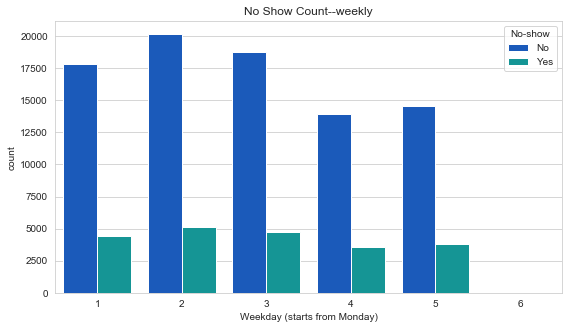

In [40]:
## now lets draw some graphs for week days having highest number of no show count

sns.set_style('whitegrid')
figure = plot.figure(figsize=(20,5))
ax = figure.add_subplot(1,2,1)
ax.set_title("No Show Count--weekly")
sns.countplot(x="Day Number",hue="No-show",data=noshow,palette='winter',ax=ax)
ax.set_xlabel("Weekday (starts from Monday)")

Graph above shows that First 3 days of the week has highest No Show count.


## 2. Lets check the rate of no show for each day of week.

In [45]:
## For that, lets first group the age in a function ageGroup.

def ageGroup(x):
    if x < 18:
        return "Young <18"
    elif x >= 18 and x <= 35:
        return "Adult(18-35)"
    elif x > 35 and x <= 64:
        return "Older(36-64)"
    else:
        return "65+"
    
noshow['AgeGroup'] = noshow['Age'].apply(ageGroup)  ## insert AgeGroup in dataframe

noshow['Month Number'] = noshow['Appointment Day'].dt.month   ## adds Month Number column in data frame based on appointment day

## Now lets create a rate_wk dataframe

rate_wk = noshow.pivot_table(values=["HyperTension","Diabetes","Alcoholism","Handicap"],
                         columns=["No-show",'Gender','AgeGroup',"Week_Day"],index=["Month Number"],aggfunc=np.sum)
week = rate_wk.unstack().unstack('No-show').reset_index().rename(columns={"level_0":"Desiase"})
week['Total'] = week['Yes'] + week['No']
week['No Show Rate'] = week['Yes'] / week['Total']
week.head()

No-show,Desiase,Gender,AgeGroup,Week_Day,Month Number,No,Yes,Total,No Show Rate
0,Alcoholism,F,65+,Friday,1,0.0,NaN,NaN,NaN
1,Alcoholism,F,65+,Friday,2,0.0,0.0,0.0,NaN
2,Alcoholism,F,65+,Friday,3,0.0,0.0,0.0,NaN
3,Alcoholism,F,65+,Friday,4,6.0,1.0,7.0,0.142857
4,Alcoholism,F,65+,Friday,5,2.0,3.0,5.0,0.600000


In [42]:
## here we can see that the data contain NaN value. So lets first replace it with 0.

week[['Yes',"No","Total"]] = week[['Yes',"No","Total"]].fillna(0).astype(int)
week['No Show Rate'] = week['No Show Rate'].round(2).fillna(0)
week.head()

No-show,Desiase,Gender,AgeGroup,Week_Day,Month Number,No,Yes,Total,No Show Rate
0,Alcoholism,F,65+,Friday,1,0,0,0,0.00
1,Alcoholism,F,65+,Friday,2,0,0,0,0.00
2,Alcoholism,F,65+,Friday,3,0,0,0,0.00
3,Alcoholism,F,65+,Friday,4,6,1,7,0.14
4,Alcoholism,F,65+,Friday,5,2,3,5,0.60


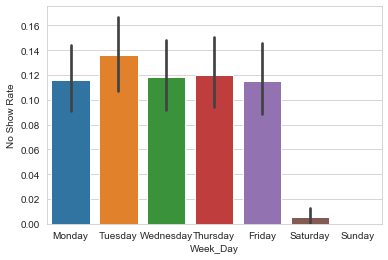

In [13]:
sns.barplot("Week_Day","No Show Rate",data=week,estimator=np.mean,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

The graph shows that the minimum no show rate is on saturday while highest is on Tuesday.

## 3. Now lets see which month of the year have largest No Show count.

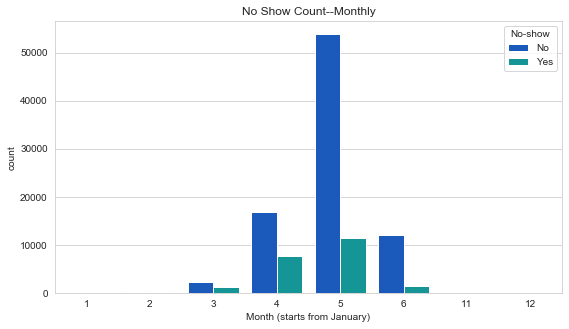

In [14]:
## Here we can generate month number from Appointment Day.
noshow['Month Number'] = noshow['Appointment Day'].dt.month   ## adds Month Number column in data frame

figure = plot.figure(figsize=(20,5))
ax2 = figure.add_subplot(1,2,2)
ax2.set_title("No Show Count--Monthly")
sns.countplot(x="Month Number",hue="No-show",data=noshow,palette='winter',ax=ax2)
ax2.set_xlabel("Month (starts from January)")

plot.tight_layout
plot.show()


Fro the data avilable, this plot shows that the highest No show count is their in April and May. However, highest people visit hospital is also in the month of May.

## 4. Now, lets see the highest No Show Rate based on the Desiase category.

In [15]:
## for that lets modify our data frame a bit again.

df = noshow.pivot_table(values=["HyperTension","Diabetes","Alcoholism","Handicap"],
                       columns="No-show", aggfunc=np.sum)
rate = df.unstack().unstack('No-show').reset_index()
rate['Desiase'] = rate['index']
rate.drop(['index'], axis=1, inplace = True)
rate["No-show Rate"] = rate['Yes'] / (rate['Yes'] + rate['No'])
rate

No-show,No,Yes,Desiase,No-show Rate
0,2683,677,Alcoholism,0.201488
1,6513,1430,Diabetes,0.180033
2,2005,453,Handicap,0.184296
3,18029,3772,HyperTension,0.173020


The table above shows that Alcoholism has highest no show rate while, HyperTension has the lowest now show rate.

## 5. Now lets chek this No-show rate for each month for each desiase catogery

In [16]:
## for that let again modify the data for each month

df = noshow.pivot_table(values=["HyperTension","Diabetes","Alcoholism","Handicap"],
                       columns="No-show",index="Month Number",aggfunc=np.sum)
rate = df.unstack().unstack('No-show').reset_index().rename(columns={"level_0":"Desiase"})
rate["No-show Rate"] = rate['Yes'] / (rate['Yes'] + rate['No'])
rate.head()


No-show,Desiase,Month Number,No,Yes,No-show Rate
0,Alcoholism,1,1.0,2.0,0.666667
1,Alcoholism,2,4.0,0.0,0.000000
2,Alcoholism,3,26.0,18.0,0.409091
3,Alcoholism,4,393.0,211.0,0.349338
4,Alcoholism,5,1788.0,402.0,0.183562


In [17]:
## lets generate the line graph to visualize the trend

Diabetes = rate[rate['Desiase'] == 'Diabetes']
Alcoholism = rate[rate['Desiase'] == 'Alcoholism']
Handicap = rate[rate['Desiase'] == 'Handicap']
Hyper = rate[rate['Desiase'] == 'HyperTension']

trace = go.Scatter(
    x= Diabetes['Month Number'],
    y=Diabetes['No-show Rate']*100,
    mode= 'lines+markers',
    text=Diabetes['Desiase'],
    name="Diabetes")

trace2 = go.Scatter(
    x= Alcoholism['Month Number'],
    y=Alcoholism['No-show Rate']*100,
    mode= 'lines+markers',
    text=Alcoholism['Desiase'],
    name="Alcoholism")

trace3 = go.Scatter(
    x= Handicap['Month Number'],
    y=Handicap['No-show Rate']*100,
    mode= 'lines+markers',
    text=Handicap['Desiase'],
    name='Handicap')

trace4 = go.Scatter(
    x= Hyper['Month Number'],
    y=Hyper['No-show Rate']*100,
    mode= 'lines+markers',
    text=Hyper['Desiase'],
    name='HyperTension')


layout = dict(title = "No Shows",hovermode='closest',xaxis=dict({"title":"Month (Starts at January)"}),
             yaxis=dict({"title":"No Show Rate %"}))
dat = [trace,trace2,trace3,trace4]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='basic-line')

As per the data avilable, 
1. the graph shows that the Alcoholism has the highest no show rate.
2. Sharp rise in no show rate in 2nd month, except alcoholism.
3. First 3 Summer months have highest no show rate.
4. Data not avilable for whole year.


## 6. Now lets check no show rate based on Age Group

In [18]:

df2 = noshow.pivot_table(values=["HyperTension","Diabetes","Alcoholism","Handicap"],
                          columns=["No-show"],index=["Month Number",'AgeGroup'],aggfunc=np.sum)


rate2 = df2.unstack().unstack('AgeGroup').unstack('No-show').reset_index().rename(columns={"level_0":"Desiase"})

rate2['No Show Rate'] = rate2['Yes'] / (rate2['Yes'] + rate2['No'])
rate2['Total'] = rate2['Yes'] + rate2['No']

In [19]:
rate2.groupby(['AgeGroup','Desiase'])['Yes','No','Total'].sum()

No-show                       Yes       No    Total
AgeGroup     Desiase                               
65+          Alcoholism      58.0    296.0    354.0
             Diabetes       577.0   2786.0   3363.0
             Handicap       133.0    585.0    718.0
             HyperTension  1370.0   7167.0   8537.0
Adult(18-35) Alcoholism     116.0    332.0    448.0
             Diabetes        62.0    164.0    226.0
             Handicap        73.0    351.0    424.0
             HyperTension   171.0    639.0    810.0
Older(36-64) Alcoholism     491.0   2043.0   2534.0
             Diabetes       775.0   3528.0   4303.0
             Handicap       163.0    868.0   1031.0
             HyperTension  2218.0  10198.0  12416.0
Young <18    Alcoholism      12.0     12.0     24.0
             Diabetes        16.0     35.0     51.0
             Handicap        84.0    201.0    285.0
             HyperTension    13.0     25.0     38.0

The above dataset shows that 
    1.  the most prevelent desiase found in all age group is Hypertension. However, the line graph above shows that HyperTension paitents have low No-show rate compare to all other desiases.
    2.  Young age group has highest no show rate


Lets, draw a heatmap Graph to visualize the No-show Rate based on age groupb as shown in above dataset.


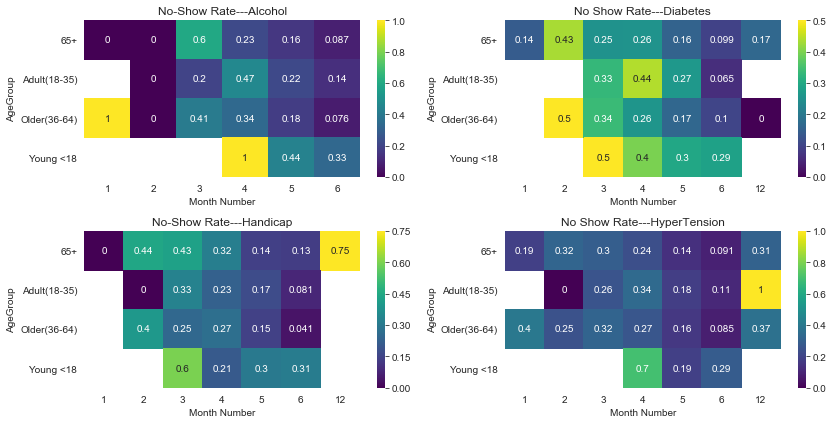

In [20]:
fig = plot.figure(figsize=(12,6))
ax = fig.add_subplot(221)
sns.heatmap(rate2[rate2['Desiase'] == 'Alcoholism'].pivot_table(values="No Show Rate",index="AgeGroup",columns='Month Number'),
           cmap='viridis',annot=True)
ax.set_title('No-Show Rate---Alcohol')

ax2 = fig.add_subplot(222)
sns.heatmap(rate2[rate2['Desiase'] == 'Diabetes'].pivot_table(values="No Show Rate",index="AgeGroup",columns='Month Number'),
           cmap='viridis',annot=True)
ax2.set_title('No Show Rate---Diabetes')

ax3 = fig.add_subplot(223)
sns.heatmap(rate2[rate2['Desiase'] == 'Handicap'].pivot_table(values="No Show Rate",index="AgeGroup",columns='Month Number'),
           cmap='viridis',annot=True)
ax3.set_title('No-Show Rate---Handicap')

ax4 = fig.add_subplot(224)
sns.heatmap(rate2[rate2['Desiase'] == 'HyperTension'].pivot_table(values="No Show Rate",index="AgeGroup",columns='Month Number'),
           cmap='viridis',annot=True)
ax4.set_title('No Show Rate---HyperTension')

plot.tight_layout()
plot.show()

## 7. Now lets check the effect of gender on No Show Rate

In [21]:

df3 = noshow.pivot_table(values=["HyperTension","Diabetes","Alcoholism","Handicap"],
                          columns=["No-show",'Gender','AgeGroup'],index="Month Number",aggfunc=np.sum)
gender = df3.unstack().unstack('No-show').reset_index().rename(columns={"level_0":"Desiase"})
gender['Total'] = gender['Yes'] + gender['No']
gender['No Show Rate'] = gender['Yes'] / gender['Total']
gender['No Show Rate']= gender ['No Show Rate'].fillna(0)
gender.head()

No-show,Desiase,Gender,AgeGroup,Month Number,No,Yes,Total,No Show Rate
0,Alcoholism,F,65+,1,0.0,0.0,0.0,0.000000
1,Alcoholism,F,65+,2,0.0,0.0,0.0,0.000000
2,Alcoholism,F,65+,3,1.0,0.0,1.0,0.000000
3,Alcoholism,F,65+,4,9.0,5.0,14.0,0.357143
4,Alcoholism,F,65+,5,31.0,13.0,44.0,0.295455


Here, we can see that for some month the data is not avilable.

Text(0, 0.5, 'No-Show Average')

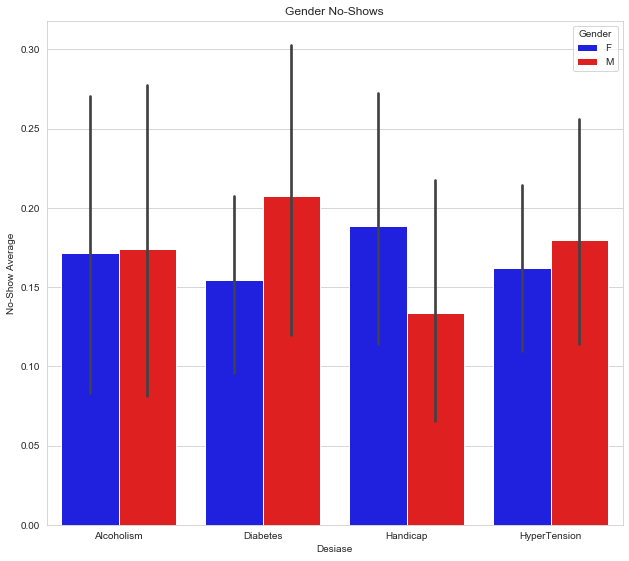

In [22]:
## Lets draw the graph
Gd = gender[(gender['AgeGroup'] != 'Less than 18')]
figure = plot.figure(figsize=(8,7))
ax = figure.add_axes([0,0,1,1])
sns.barplot(x="Desiase",y="No Show Rate",hue='Gender',data=Gd,estimator=np.mean,palette={'r','b'})
ax.set_title("Gender No-Shows")
ax.set_ylabel("No-Show Average")

We can see here that male patients have the highest No Show rate mainly in HyperTension and Diabetes category. We can also say from the plot that women try to hide their Alcoholism. However, there is no major difference between the no show rate of Male and female.


### Conclusion

From above analysis we can conclude that Plots based on the data available to us we tried to generate some analysis of the data.

1.	Highest No Show rate is on Tuesday. However, highest number of people prefer go to doctor on this day and later. Lowest is on Saturday which seems like they don’t want to west their weekend visiting hospitals. Also, instead of Monday, Tuesday have highest count to go to hospital can also be analysed as people do not want some bad news on the very first day of the week.

2.	People not prefer to go to hospitals in summer. The alcoholic people mainly in the younger and older age group have the highest No Show rate around 35% and is always high in almost all months as seen from our line graph. The line graph shows Zero rate for Second month for Alcoholic people would be because of skewed data.

3.	HyperTension is the most prevalent disease in our dataset. However, the No Show rate of these patients are lower than other patients almost every time.

4.	We can see here that male patients have the highest No Show rate mainly in HyperTension and Diabetes category. We can also say from the plot that women try to hide their Alcoholism. However, there is no major difference between the no show rate of Male and female.
